<a href="https://colab.research.google.com/github/Atikur295/Machine-Learning-Lab/blob/main/labreport3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)   # assuming input is sigmoid(x)

# ReLU activation
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [3]:
class MLP:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, activation="sigmoid", lr=0.1):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

        # Choose activation
        if activation == "sigmoid":
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == "relu":
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Activation must be 'sigmoid' or 'relu'")

        self.lr = lr

    def forward(self, X):
        # Hidden layer
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.activation(self.z1)

        # Output layer (sigmoid)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]  # batch size

        # Error at output
        error = self.a2 - y
        dZ2 = error * sigmoid_derivative(self.a2)

        # Gradients for W2, b2
        dW2 = self.a1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Error at hidden layer
        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.activation_derivative(self.a1)

        # Gradients for W1, b1
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, iterations=1000):
        losses = []
        for i in range(iterations):
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)  # MSE
            self.backward(X, y)
            losses.append(loss)
        return losses

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)


In [4]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-8)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-8)

def plot_roc(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    tpr_list, fpr_list = [], []
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))

        tpr = tp / (tp + fn + 1e-8)
        fpr = fp / (fp + tn + 1e-8)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    plt.plot(fpr_list, tpr_list, label="ROC Curve")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


Accuracy: 0.5
Precision: 0.4999999975
Recall: 0.4999999975
F1-Score: 0.4999999925000001


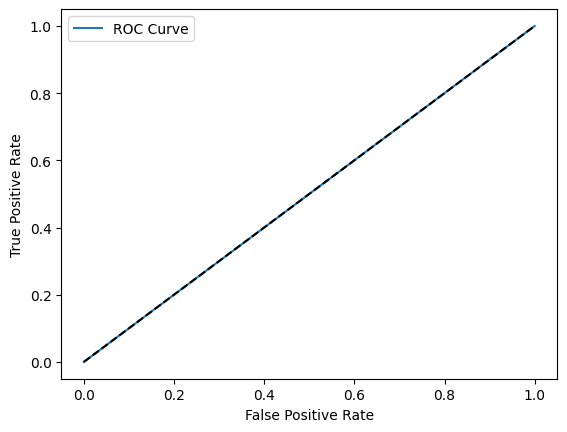

In [5]:
# XOR Problem
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Try different learning rates, iterations, and activations
mlp = MLP(activation="sigmoid", lr=0.1)
losses = mlp.train(X, y, iterations=5000)

# Predictions
y_pred = mlp.predict(X)

print("Accuracy:", accuracy(y, y_pred))
print("Precision:", precision(y, y_pred))
print("Recall:", recall(y, y_pred))
print("F1-Score:", f1_score(y, y_pred))

# ROC curve
y_scores = mlp.forward(X)
plot_roc(y, y_scores)
